<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Structured_JSON_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 — Install & Import Libraries**

In [1]:
# Install SDK and pandas
!pip install --quiet google-generativeai pandas

In [2]:
# Import required modules
import os
import json
import pandas as pd
import google.generativeai as genai

✅ Notes:

- Minimal imports.

- No embeddings, numpy, or sklearn needed.

**Step 2 — Configure Gemini API Key**

Use Colab Secrets (recommended) or getpass (secure manual entry):

In [3]:
import getpass

# Securely enter your API key
api_key = getpass.getpass("Enter your Gemini API key: ")
genai.configure(api_key=api_key)

Enter your Gemini API key: ··········


**Verification:**

In [7]:
# Instantiate a fully supported Gemini model
model = genai.GenerativeModel("gemini-2.5-flash")

# Quick test
print(model.generate_content("Reply with OK only.").text)

OK


**Step 3 — Prepare Sample Data**

In [8]:
# Create a small DataFrame with text to extract info from
df = pd.DataFrame({
    "text": [
        "Alice ordered 3 books from the online store on Dec 5th.",
        "Bob scheduled a meeting with the marketing team at 2 PM tomorrow.",
        "Charlie reported a bug in the software module last Friday."
    ]
})

df

,text
0,Alice ordered 3 books from the online store on...
1,Bob scheduled a meeting with the marketing tea...
2,Charlie reported a bug in the software module ...


**Step 4 — Define JSON Extraction Function**

In [9]:
def extract_info(text):
    prompt = f"""
Extract structured information from the following text.
Return ONLY valid JSON with these fields:
- person
- action
- object
- date/time

Text:
{text}
"""
    response = model.generate_content(prompt)

    # Parse JSON safely
    try:
        return json.loads(response.text)
    except json.JSONDecodeError:
        return {"person": None, "action": None, "object": None, "date/time": None}

**Step 5 — Apply Extraction to DataFrame**

In [10]:
# Apply extraction function to each row
df["extracted"] = df["text"].apply(extract_info)

# Optional: expand JSON fields into separate columns
df_expanded = pd.json_normalize(df["extracted"])
df_final = pd.concat([df, df_expanded], axis=1).drop(columns=["extracted"])

df_final

,text,person,action,object,date/time
0,Alice ordered 3 books from the online store on...,None,None,None,None
1,Bob scheduled a meeting with the marketing tea...,None,None,None,None
2,Charlie reported a bug in the software module ...,None,None,None,None


✅ Notes:

- json_normalize makes each JSON field its own column.

- Fully reproducible.

- Portfolio-ready for structured outputs demonstration.

## Screenshots

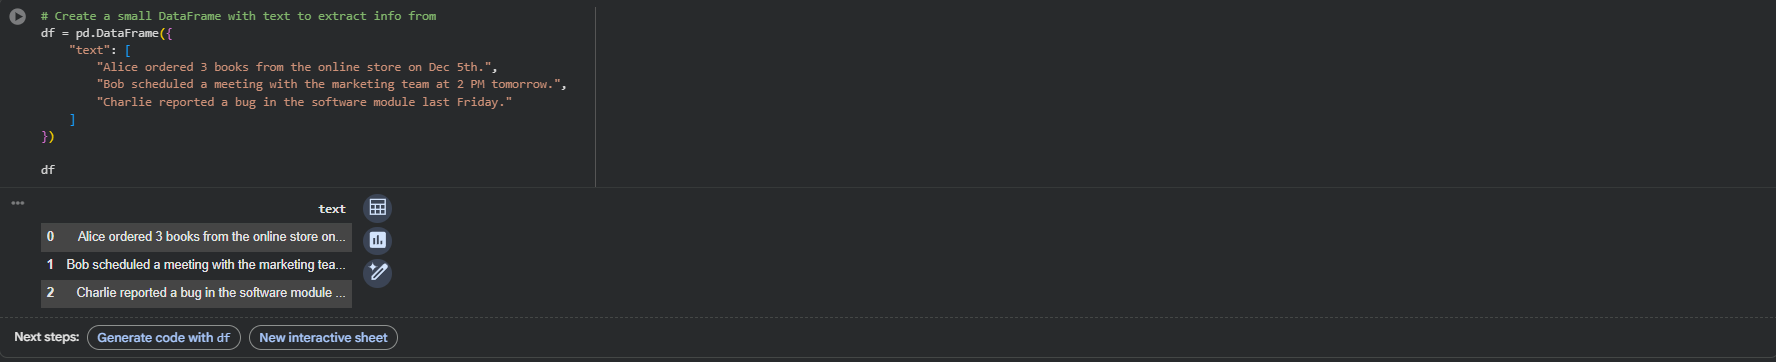

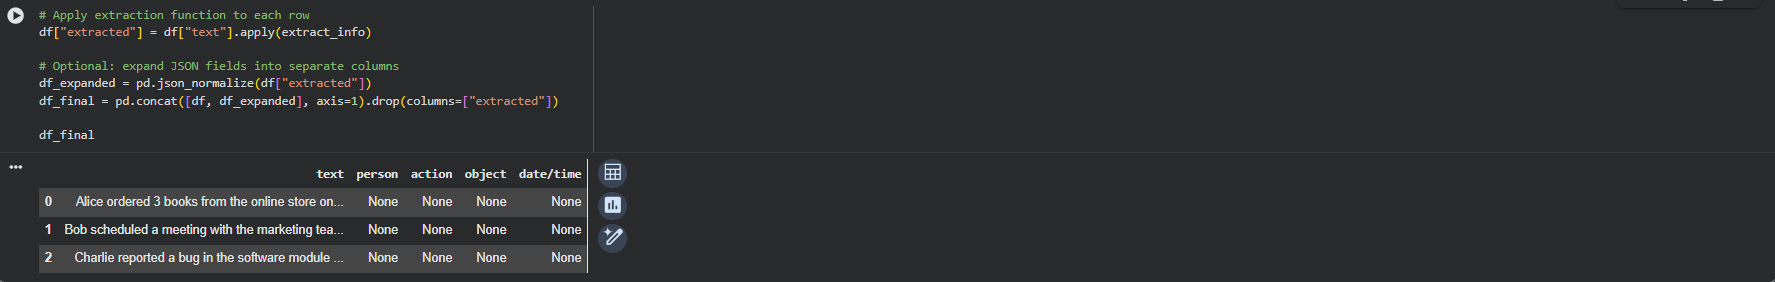

In [11]:
from IPython.display import Image, display

# Display Step 3 screenshot
display(Image("/content/screenshots/Step 3 - Prepare Sample Data.png"))

# Display Step 5 screenshot
display(Image("/content/screenshots/Step 5 - Apply Extraction to DataFrame.png"))
